In [1]:
import time
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb

import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
)

for i in ds_train.batch(60000):
    a = i
    
for i in ds_test.batch(60000):
    b = i

In [2]:
xtrain = a[0].numpy().reshape([-1,28*28])
ytrain = a[1].numpy()

xtest = b[0].numpy().reshape([-1,28*28])
ytest = b[1].numpy()

dtrain = xgb.DMatrix(xtrain,label=ytrain)
dtest = xgb.DMatrix(xtest,label=ytest)

In [10]:
%%time
param = {'max_depth':2, 'eta':0.2, 'objective':'multi:softmax','eval_metric':['merror'], 'num_class':10 }
num_round = 50
watchlist = [(dtrain,'train'),(dtest,'test')]
xgb_results = dict()
bst = xgb.train(param, dtrain, num_round,watchlist,evals_result=xgb_results)

[0]	train-merror:0.40557	test-merror:0.40420
[1]	train-merror:0.32860	test-merror:0.32830
[2]	train-merror:0.28185	test-merror:0.28420
[3]	train-merror:0.25443	test-merror:0.25260
[4]	train-merror:0.23482	test-merror:0.23200
[5]	train-merror:0.22768	test-merror:0.22600
[6]	train-merror:0.21608	test-merror:0.21250
[7]	train-merror:0.20887	test-merror:0.20340
[8]	train-merror:0.20162	test-merror:0.19830
[9]	train-merror:0.19633	test-merror:0.19120
[10]	train-merror:0.18933	test-merror:0.18570
[11]	train-merror:0.18567	test-merror:0.18010
[12]	train-merror:0.18072	test-merror:0.17610
[13]	train-merror:0.17565	test-merror:0.17180
[14]	train-merror:0.17158	test-merror:0.16660
[15]	train-merror:0.16703	test-merror:0.16140
[16]	train-merror:0.16198	test-merror:0.15620
[17]	train-merror:0.15812	test-merror:0.15350
[18]	train-merror:0.15417	test-merror:0.14940
[19]	train-merror:0.15183	test-merror:0.14910
[20]	train-merror:0.14773	test-merror:0.14610
[21]	train-merror:0.14475	test-merror:0.1418

In [4]:
%%time
from wideboost.helpers import onehot
# wideboost uses the hessian for multi:softmax rather than 2 times the hessian as used in xgboost.
# On Fashion MNIST at least, the hessian tends to perform better. xgb uses eta = 0.2 as a better comparison.
param['eta'] = 0.1

# 'btype' = 'I', 'beta_eta' = 0 and 'extra_dims' = 0 is equivalent to boosting
param['extra_dims'] = 0
param['btype'] = 'I'   
param['beta_eta'] = 0

# 'num_class' is replaced by 'output_dim'
param['num_class'] = None
param['output_dim'] = 10

wxgb_results = dict()
watchlist = [((xtrain, onehot(ytrain)),'train'),((xtest, onehot(ytest)),'test')]
wbst = wxgb.fit(
    xtrain, onehot(ytrain),
    param, num_round, watchlist,evals_result=wxgb_results
)

[0]	train-merror:0.40557	test-merror:0.40420
[1]	train-merror:0.32860	test-merror:0.32830
[2]	train-merror:0.28187	test-merror:0.28420
[3]	train-merror:0.25488	test-merror:0.25290
[4]	train-merror:0.23483	test-merror:0.23210
[5]	train-merror:0.22772	test-merror:0.22610
[6]	train-merror:0.21600	test-merror:0.21240
[7]	train-merror:0.20888	test-merror:0.20320
[8]	train-merror:0.20163	test-merror:0.19830
[9]	train-merror:0.19638	test-merror:0.19110
[10]	train-merror:0.18943	test-merror:0.18570
[11]	train-merror:0.18567	test-merror:0.18030
[12]	train-merror:0.18073	test-merror:0.17600
[13]	train-merror:0.17568	test-merror:0.17180
[14]	train-merror:0.17165	test-merror:0.16650
[15]	train-merror:0.16685	test-merror:0.16110
[16]	train-merror:0.16135	test-merror:0.15640
[17]	train-merror:0.15745	test-merror:0.15230
[18]	train-merror:0.15377	test-merror:0.14930
[19]	train-merror:0.15082	test-merror:0.14760
[20]	train-merror:0.14777	test-merror:0.14350
[21]	train-merror:0.14408	test-merror:0.1420

In [8]:
%%time
# Adding more dimensions fits more trees per round but also decreases loss with fewer boost rounds
param['extra_dims'] = 10
param['beta_eta'] = 0.001
wxgb10_results = dict()
wbst = wxgb.fit(
    xtrain, onehot(ytrain),
    param, num_round, watchlist, evals_result=wxgb10_results
)

[0]	train-merror:0.30663	test-merror:0.30730
[1]	train-merror:0.24965	test-merror:0.24790
[2]	train-merror:0.22025	test-merror:0.21770
[3]	train-merror:0.19958	test-merror:0.19530
[4]	train-merror:0.18380	test-merror:0.18260
[5]	train-merror:0.17270	test-merror:0.17330
[6]	train-merror:0.16268	test-merror:0.16080
[7]	train-merror:0.15338	test-merror:0.15240
[8]	train-merror:0.14540	test-merror:0.14450
[9]	train-merror:0.13782	test-merror:0.13730
[10]	train-merror:0.13158	test-merror:0.13320
[11]	train-merror:0.12590	test-merror:0.12720
[12]	train-merror:0.12127	test-merror:0.12240
[13]	train-merror:0.11688	test-merror:0.11960
[14]	train-merror:0.11350	test-merror:0.11600
[15]	train-merror:0.10953	test-merror:0.11230
[16]	train-merror:0.10627	test-merror:0.10930
[17]	train-merror:0.10345	test-merror:0.10680
[18]	train-merror:0.10060	test-merror:0.10250
[19]	train-merror:0.09785	test-merror:0.10200
[20]	train-merror:0.09585	test-merror:0.10060
[21]	train-merror:0.09323	test-merror:0.0982

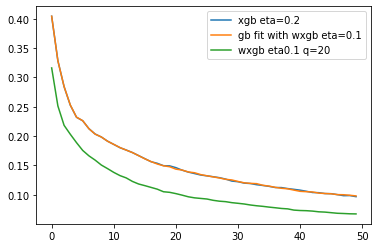

In [7]:
plt.plot(xgb_results['test']['merror'], label='xgb eta=0.2')
plt.plot(wxgb_results['test']['merror'], label='gb fit with wxgb eta=0.1')
plt.plot(wxgb10_results['test']['merror'], label='wxgb eta0.1 q=20')
plt.legend()
plt.show()